
### NYC Citi Bike Data Exploration



In [1]:
import pandas as pd
import folium
import calendar # for datetime operation
import time # for datetime operation
import seaborn as sns  # visualization 
import matplotlib.pyplot as plt # visulization 
import numpy as np

The NYC Citi Bike program makes its data public, which can be downloaded from
https://www.citibikenyc.com/system-data. Here I use the most recent data of as of September 2019 (https://s3.amazonaws.com/tripdata/index.html) as a simple example.


In [2]:
bike_data = pd.read_csv("201909-citibike-tripdata.csv")
bike_data.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,327,2019-09-01 00:00:01.9580,2019-09-01 00:05:29.3410,3733,Avenue C & E 18 St,40.730563,-73.973984,504,1 Ave & E 16 St,40.732219,-73.981656,39213,Subscriber,1968,1
1,1145,2019-09-01 00:00:04.1430,2019-09-01 00:19:09.8360,3329,Degraw St & Smith St,40.682915,-73.993182,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,21257,Customer,1969,0
2,1293,2019-09-01 00:00:07.3090,2019-09-01 00:21:40.7580,3168,Central Park West & W 85 St,40.784727,-73.969617,423,W 54 St & 9 Ave,40.765849,-73.986905,15242,Customer,1969,0


There is inconsitency in the name of the columns in the csv files between old (before 2017) and recent (after 2017) datas. To correctly analyze all historical data, I make some changes to make sure all the column names are the same in the Pandas data frame.

In [3]:
bike_data.rename(columns={'starttime': 'Start Time'}, inplace=True)
bike_data.rename(columns={'stoptime': 'Stop Time'}, inplace=True)
bike_data.rename(columns={'start station id': 'Start Station ID'}, inplace=True)
bike_data.rename(columns={'start station name': 'Start Station Name'}, inplace=True)
bike_data.rename(columns={'start station latitude': 'Start Station Latitude'}, inplace=True)
bike_data.rename(columns={'start station longitude': 'Start Station Longitude'}, inplace=True)
bike_data.rename(columns={'end station id': 'End Station ID'}, inplace=True)
bike_data.rename(columns={'end station name': 'End Station Name'}, inplace=True)
bike_data.rename(columns={'end station latitude': 'End Station Latitude'}, inplace=True)
bike_data.rename(columns={'end station longitude': 'End Station Longitude'}, inplace=True)
bike_data.head(3)
bike_data["Start Time"] = pd.to_datetime(bike_data["Start Time"])
bike_data["Stop Time"] = pd.to_datetime(bike_data["Stop Time"])
bike_data["hour"] = bike_data["Start Time"].map(lambda x: x.hour)


#### Bike trip duration distribution
Here I plot the distribution of all the bike trips taken in September 2019 that are with in two hours. The plot shows that most of the trips takes shorter than 20 minutes.

/Applications/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


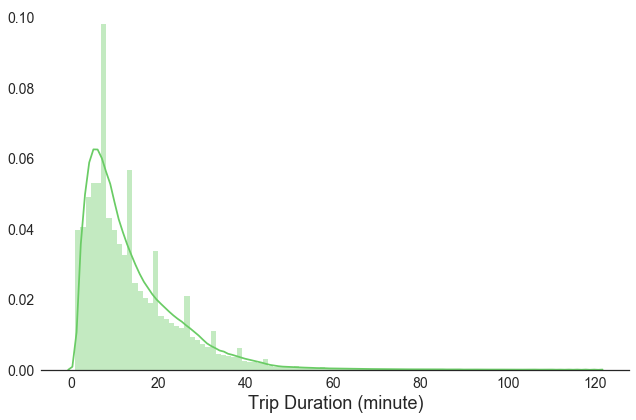

In [4]:
normal_trip = bike_data[bike_data['tripduration']<=7200]
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(9, 6), sharex=True)
sns.despine(left=True)
sns.distplot(normal_trip['tripduration'].values//60, axlabel = 'Trip Duration (minutes)', label = 'Trip Duration)', bins = 100, color="g")
#sns.distplot(train['trip_duration'].values, axlabel = 'Log(trip_duration)', label = 'log(trip_duration)', bins = 50, color="g")
#plt.setp(axes, yticks=[])
plt.setp(axes,yticks=np.arange(0, 0.12, step=0.02))
axes.xaxis.set_tick_params(labelsize=14)
axes.yaxis.set_tick_params(labelsize=14)
plt.xlabel('Trip Duration (minute)', fontsize=18)
plt.tight_layout()
plt.show()


#### Aggregated number of bike rides by day of the week and by hour of the day
The plots show that during September 2019 Monday and Sunday are the busiest days of the week in terms of total number of bike rides. Moreover, there is not too much variation in terms of the number of trips across the weekdays. If we look at the number of rides hourly, the top three busiest hours are 5PM, 6PM, and 8AM, respectively.

In [5]:
bike_data1=bike_data.copy()
bike_data1["day"] = pd.to_datetime(bike_data1['Start Time']).dt.weekday

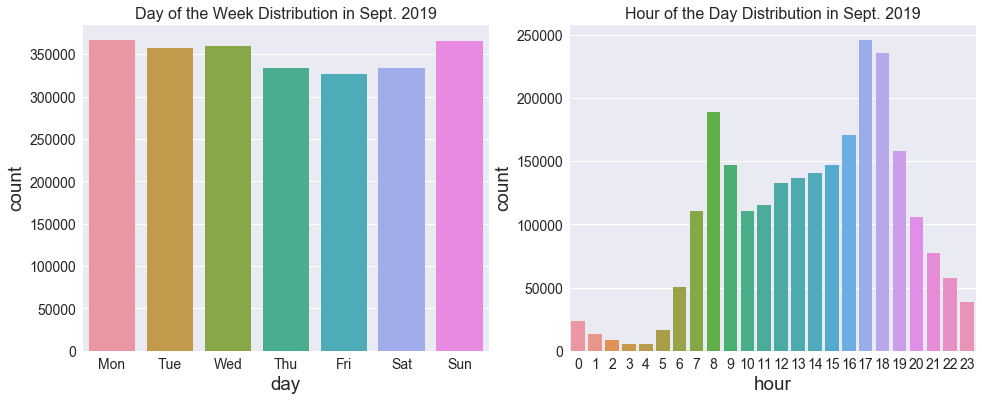

In [15]:
sns.set(font_scale=1.7)
f, ax = plt.subplots(ncols=2, nrows=1, figsize=(16,6))
sns.countplot(x="day",  data=bike_data1, ax =ax[0])
_ = ax[0].set_xticklabels([calendar.day_abbr[int(k.get_text())] for k in ax[0].get_xticklabels()])
ax[0].set_title('Day of the Week Distribution in Sept. 2019', fontsize=16)
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)
sns.countplot(bike_data1['hour'], ax =ax[1])
ax[1].set_title('Hour of the Day Distribution in Sept. 2019', fontsize =16)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)
plt.show()